In [2]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
PATCH_PATH = ('cylinder2_rgba_small')

In [4]:
X_train, y_train, X_test, y_test = gp.Patch.load_rgba(PATCH_PATH)

Loaded /home/d/patches//cylinder2_rgba_small/ in 0.000566005706787 seconds.


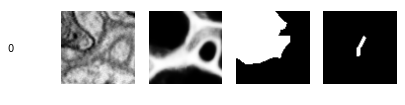

In [5]:
gp.Util.view_rgba(X_train[100], y_train[100])

In [7]:
cnn = nets.RGBANetPlus()

CNN configuration: 
    Our CNN with image, prob, merged_array and border overlap as RGBA.

    This includes dropout.
    


In [8]:
cnn = cnn.fit(X_train, y_train)

# Neural Network with 171474 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     4x75x75
  1  conv1     64x73x73
  2  pool1     64x36x36
  3  dropout1  64x36x36
  4  conv2     48x34x34
  5  pool2     48x17x17
  6  dropout2  48x17x17
  7  conv3     48x15x15
  8  pool3     48x7x7
  9  dropout3  48x7x7
 10  conv4     48x5x5
 11  pool4     48x2x2
 12  dropout4  48x2x2
 13  hidden5   512
 14  dropout5  512
 15  output    2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       0.46396       0.31323      1.48122      0.87315  27.51s
      2       0.28116       0.25516      1.10193      0.90459  26.38s
      3       0.23199       0.21672      1.07049      0.91938  26.42s
      4       0.21736       0.19727      1.10185      0.92764  26.37s
      5       0.20625       0.19145      1.07729      0.92794  26.63s
      6       0.20049       0.17983    

In [10]:
test_accuracy = cnn.score(X_test, y_test)

In [11]:
test_accuracy

0.9294150731158605

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

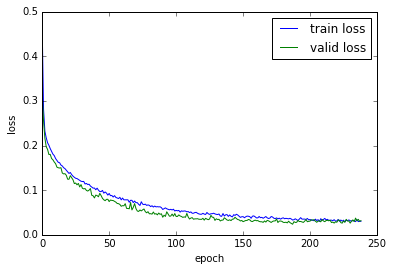

In [12]:
plot_loss(cnn)

In [16]:
# store CNN
sys.setrecursionlimit(1000000000)
with open(os.path.expanduser('~/Projects/gp/nets/RGBAPlus.p'), 'wb') as f:
  pickle.dump(cnn, f, -1)